<a href="https://colab.research.google.com/github/kaziamin/CV/blob/master/Copy_of_CH3_24_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sample3 import MyModel

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Dense,Input
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X = df.drop('Outcome',axis=1)  # X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
inputs = Input(shape=(8,))

In [ ]:
b = MyModel()

In [ ]:
b.call(inputs)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_4>

In [ ]:
b.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
b.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
b.fit(X_train,y_train,epochs=100,batch_size=5,verbose=1)

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8551 - loss: 0.2996
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.3259
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3253
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8419 - loss: 0.3425
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.3366
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3061
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.3157
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8335 - loss: 0.3221
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.3318
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3247
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8518 - loss: 0.2949
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
scores = b.evaluate(X_test,y_test)
print('Accuracy : ',scores[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7411 - loss: 0.9278  
Accuracy :  0.7402597665786743


In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.astype('float')/255.0
X_test = X_test.astype('float')/255.0

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

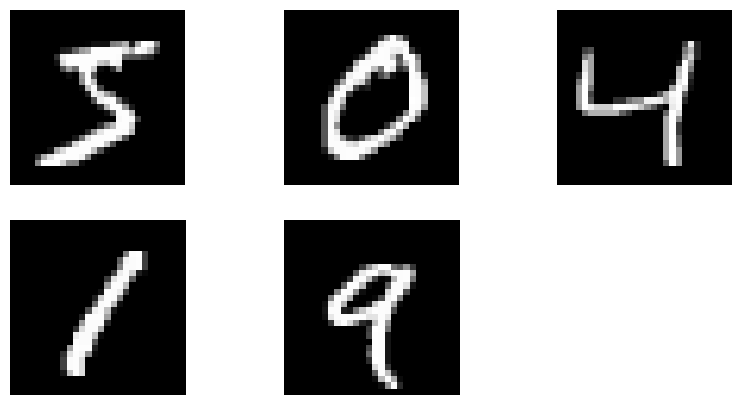

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=10,verbose=1)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8922 - loss: 0.3593
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9693 - loss: 0.1014
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9788 - loss: 0.0665
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9836 - loss: 0.0496
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9873 - loss: 0.0405
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9897 - loss: 0.0316
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9903 - loss: 0.0283
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9920 - loss: 0.0252
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9933 - loss: 0.0224
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9939 - loss: 0.0193


In [ ]:
scores = model.evaluate(X_test,y_test)
print('Accuracy : ',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.1172
Accuracy :  0.9800999760627747


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


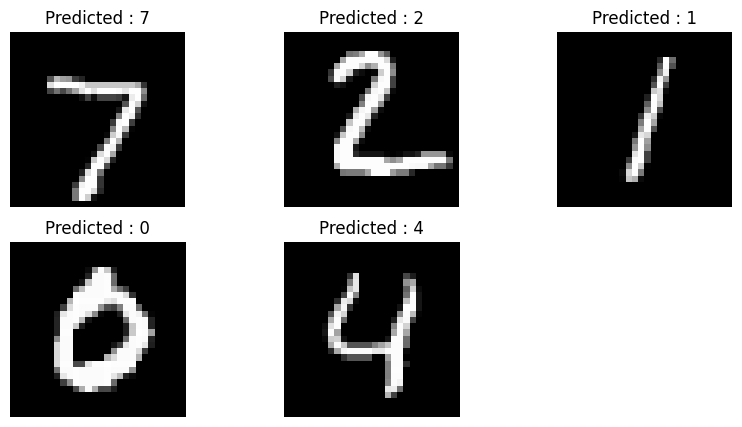

In [ ]:
predictions = model.predict(X_test[:5])
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(X_test[i],cmap='gray')
  plt.axis('off')
  plt.title(f"Predicted : {np.argmax(predictions[i])}")
plt.show()